# What is a t-test?

A t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's commonly used when the sample size is small or the population standard deviation is unknown.

It uses **t-distributions** to evaluate the expected variability. When you have a reasonable-sized sample (over 30 or so observations), the t test can still be used, but other tests that use the normal distribution (the z test) can be used in its place.

#### Additional

Sometimes t-tests are called **“Student’s” t tests**, which is simply a reference to their unusual history.

It got its name because a brewer from the Guinness Brewery, William Gosset, published about the method under the pseudonym "Student". He wanted to get information out of very small sample sizes (often 3-5) because it took so much effort to brew each keg for his samples.

### What is a t-distribution?

A t-distribution is similar to a normal distribution. It’s a bell-shaped curve, but compared to a normal it has fatter tails, which means that it’s more common to observe extremes. T-distributions are identified by the number of degrees of freedom. The higher the number, the closer the t-distribution gets to a normal distribution. After about 30 degrees of freedom, a t and a standard normal are practically the same.

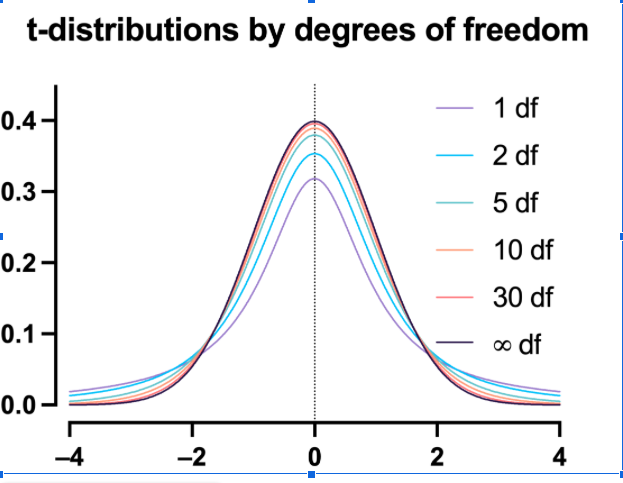

### What are degrees of freedom?

Degrees of freedom are a measure of how large your dataset is. They aren’t exactly the number of observations, because they also take into account the number of parameters (e.g., mean, variance) that you have estimated.


### How do I calculate degrees of freedom for my t test?

In most practical usage, degrees of freedom are the number of observations you have minus the number of parameters you are trying to estimate.


### When to use a t test?

A t test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.

The t test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests (*eg. z-test*). The t test assumes your data:

* **Independence**: value of one observation shouldn't influence value of another observation 
* **Normality**: population and samples are (approximately) normally distributed
* **Random Sampling**: representative subset of population and unknowm population std.
* **Homogeneity of Variance**: have a similar amount of variance within each group being compared

If your data do not fit these assumptions, you can try a **nonparametric** (*eg. Shapiro-Wilk Test*) alternative to the t test, such as the Wilcoxon Signed-Rank test for data with unequal variances.

### There are different types of t-tests:


**1. One-sample t-test**: Determines whether the mean of a single sample is significantly different from a known or hypothesized population mean.

**2. Independent samples t-test**: Compares the means of two independent groups to determine if they are significantly different from each other.

**3. Paired samples t-test**: Compares the means of two related groups to determine if there is a significant difference between their means. The groups are related in that they represent two measurements taken from the same individuals or items.

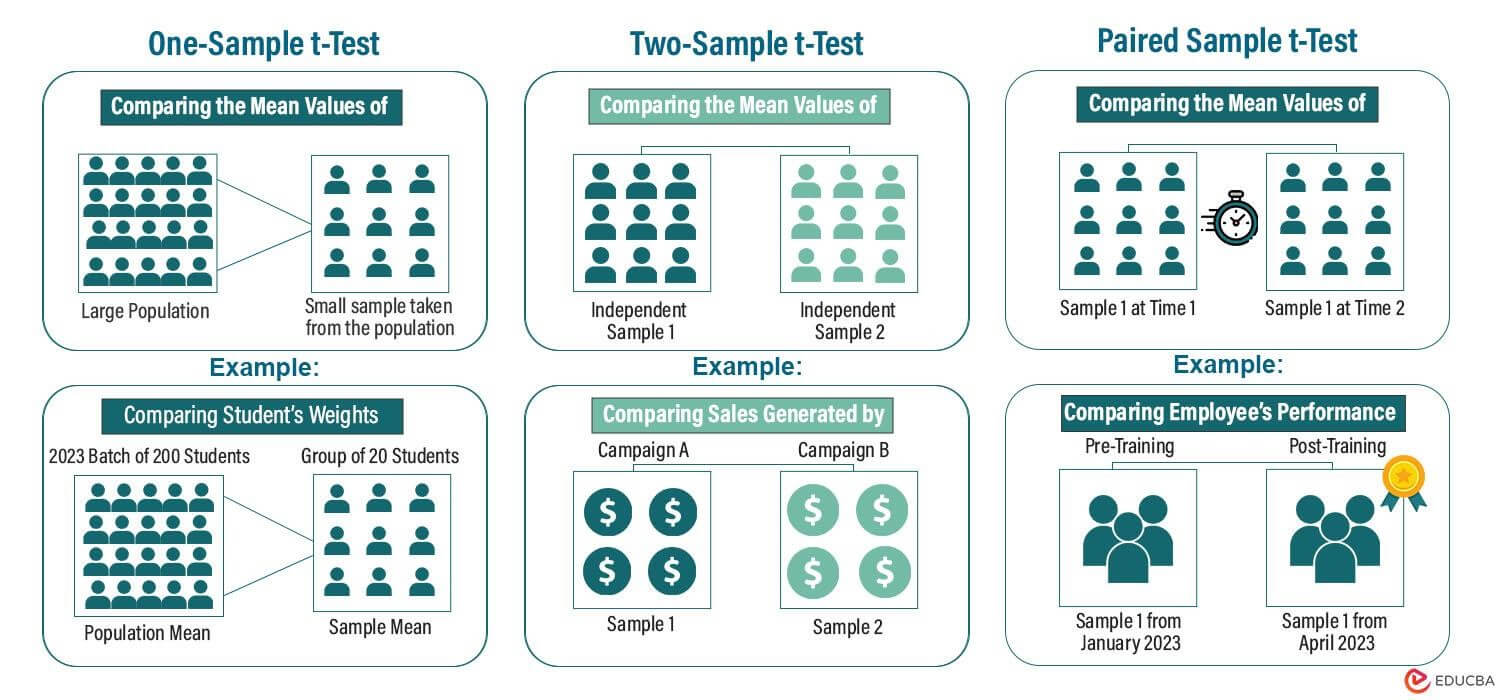

### One-tailed or two-tailed t test?

* If you only care whether the two populations are different from one another, perform a **two-tailed t test**.
* If you want to know whether one population mean is greater than or less than the other, perform a **one-tailed t test**.

# One-sample t-test 

The one-sample t-test is a statistical method used to determine whether the mean of a single sample is significantly different from a known or hypothesized population mean.

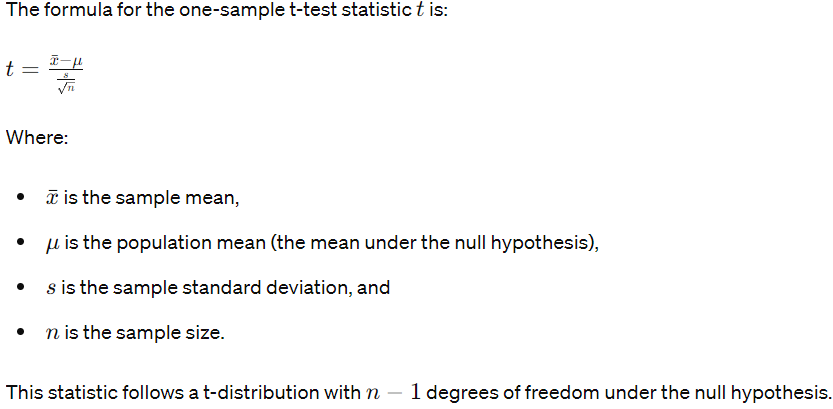

#### **Question**

A pharmaceutical company has developed a new drug to reduce blood pressure. They claim that the average reduction in blood pressure after taking the drug for one month is at least 10 mmHg. To test this claim, a sample of 30 patients who have been prescribed the drug is selected, and their blood pressure reductions are recorded. Can we conclude, with a significance level of 0.05, that the average reduction in blood pressure is indeed at least 10 mmHg?

 #### Formulate Hypotheses:

 
 * Null hypothesis (𝐻0): The average reduction in blood pressure is 10 mmHg
 * Alternative hypothesis (𝐻1): The average reduction in blood pressure is greater than 10 mmHg

In [1]:
import numpy as np
from scipy.stats import ttest_1samp

In [2]:
# Sample data of blood pressure reductions (in mmHg)
blood_pressure_reductions = np.array([8, 12, 9, 10, 11, 13, 10, 8, 9, 11,
                                      10, 12, 9, 10, 11, 13, 10, 8, 9, 11,
                                      10, 12, 9, 10, 11, 13, 10, 8, 9, 11])

# Null hypothesis: The average reduction in blood pressure is 10 mmHg
# Alternative hypothesis: The average reduction in blood pressure is greater than 10 mmHg
null_hypothesis_mean = 10

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(blood_pressure_reductions, null_hypothesis_mean)

# One-tailed test, so divide p-value by 2
p_value /= 2
# to find the probability of observing the observed test statistic or more extreme values in that tail.

# Set significance level
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 0.8512521898168727
p-value: 0.2008019701526057


In [3]:
# Check if null hypothesis is rejected
if p_value < alpha:
    print("Reject the null hypothesis: The average reduction in blood pressure is at least 10 mmHg.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude that the average reduction in blood pressure is at least 10 mmHg.")

Fail to reject the null hypothesis: There is insufficient evidence to conclude that the average reduction in blood pressure is at least 10 mmHg.


## Shapiro-Wilk test

The **Shapiro-Wilk test** is used to test the normality of a dataset. 

Since the one-sample t-test assumes that the data is normally distributed, we can perform the Shapiro-Wilk test to check if this assumption is met before conducting the t-test.

 Here's how you can perform the Shapiro-Wilk test in Python:

In [4]:
from scipy.stats import shapiro

In [5]:
# Perform Shapiro-Wilk test
statistic, p_value = shapiro(blood_pressure_reductions)

# Set significance level
alpha = 0.05

# Print results
print("Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Check if null hypothesis is rejected
if p_value > alpha:
    print("Fail to reject the null hypothesis: The data is normally distributed.")
else:
    print("Reject the null hypothesis: The data is not normally distributed.")

Shapiro-Wilk Test:
Statistic: 0.9311803579330444
p-value: 0.0527828074991703
Fail to reject the null hypothesis: The data is normally distributed.


### Advantages of One Sample t-test:

* **Simple to Implement**: It can be applied to various types of data, including continuous data with normal or approximately normal distributions.

* **Provides a Measure of Significance**: It quantifies the likelihood that any observed differences between the sample mean and the population mean are due to chance.

* **Widely Used**: The one-sample t-test is a widely accepted statistical method and is commonly used in research across various fields.

## **Z Test vs T-Test**

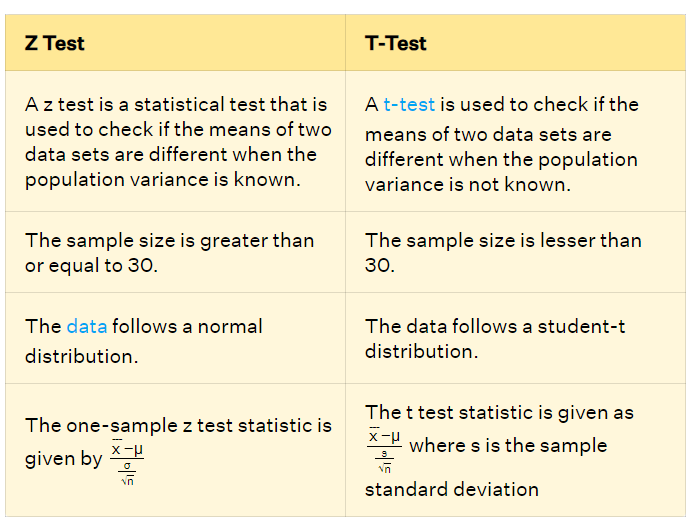